# Lab 6 - Classification

Welcome to this week's lab on Classification! This week, we will explore two classification methods: `Logistic Regression` and `KNN`.

## Part 1: Logistic Regression Walkthrough
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (where there are only two possible outcomes). It is used for binary classification tasks.

In this part, we will implement Logistic Regression to predict whether a patient has a particular disease based on certain diagnostic measurements. We will use a breast cancer dataset available through `sklearn.datasets` .

### Step 1: Import Necessary Libraries

In [211]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

### Step 2: Load & Split the Dataset

In [213]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Briefly explain the effects of changing the `test_size`.

The test_size parameter determines the proportion of data allocated to the testing set when splitting a dataset into training and testing subsets. The larger the test size, the more data will be allocated to the testing set, leaving less data for training.
Again, a larger test set provides a more reliable estimate of the model’s performance on unseen data. It helps detect overfitting
However, with less training data, the model may not learn as effectively, especially if the dataset is small. The model’s training performance might suffer due to limited data. When the training set is large, it allows the model to learn better from the data and this improves the model's training performance. The test set then becomes smaller, which can lead to higher variability in performance estimates. The model’s generalization ability might be less accurately assessed.


2. Briefly explain about the 'random_state' parameter.
   
The random_state parameter plays a crucial role in machine learning when splitting a dataset into training and testing subsets or initializing random processes. In the Scikit-learn library, random_state controls the shuffling applied to the data before splitting it. This ensures reproducibility by making the random process deterministic, which is essential for debugging and consistent results. If an integer value is used for random_state it will consistently produce the same result for that integer value. Changing the random_state value will yield different results. For each unique random_state value, there is a fixed shuffled dataset. Using the same random_state value will consistently produce the same splitting datasets.

### Step 3 (optional): EDA

In [ ]:
# Here is just an example for EDA.
# EDA: Visualize the data distributions and relationships
# Plotting histograms for each feature
import matplotlib.pyplot as plt

X.hist(bins=10, figsize=(20,15))
plt.show()

# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Why do you think it is important to do EDA while it is not always necessary?

The following are the reasons why it is important to do EDA:

- EDA helps us understand the dataset by examining its structure, distributions, and relationships. It provides insights into the data’s characteristics.

- EDA helps identify outliers, missing values, or unexpected patterns. These anomalies can impact model performance.

- It guides us in selecting relevant features for modelling. The performance of EDA can help prioritize features that have a significant impact on the target variable.

- EDA allows us to create visualizations (histograms, scatter plots, etc.) that help in communicating findings to stakeholders.

Below are the reasons when EDA might not be necessary:

- For very small datasets, EDA might not provide substantial insights beyond what’s already known.

- In domains where the data is well-understood and features are straightforward, extensive EDA may not be essential.

- Some automated techniques (like feature engineering libraries) handle data preprocessing without manual EDA.


### Step 4: Model Training

In [217]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### 1. What is the `max_iter` parameter for?

max_iter stands for maximum iterations. It determines the maximum number of iterations or epochs that an algorithm will perform during training or optimization. The specific meaning of max_iter depends on the algorithm or method being used. 

- For instance, in K-means clustering, max_iter specifies the maximum number of iterations the algorithm will run to converge.
Each iteration updates the cluster centroids based on the data points assigned to them. The algorithm stops when either the centroids stabilize or the maximum number of iterations is reached. 
- For neural networks, max_iter determines the maximum number of training epochs. An epoch represents one pass through the entire training dataset.
The neural network updates its weights during each epoch based on the training data and the chosen optimization algorithm (e.g., stochastic gradient descent, Adam). If the specified number of epochs (max_iter) is reached, the training process stops.

- Increasing max_iter can improve model performance, but it also increases computation time.
In summary, max_iter controls the number of iterations or epochs during training or optimization. 


2. Does `LogisticRegression` accept more parameters? If yes, list and briefly explain some of them.
Certainly! The LogisticRegression class in scikit-learn has several parameters that allow customization of the logistic regression model. 

The following are the parameters for logistic regression model:

- penalty: This specifies the norm of the penalty term (regularization) added to the loss function.

- 'elasticnet': It combines L1 and L2 penalties.

- None: No penalty (default).
Choose based on the problem and data characteristics.

- dual: It determines whether to use the dual (constrained) or primal (regularized) formulation.
It is only implemented for L2 penalty with the liblinear solver. It prefers dual=False when the number of samples is greater than the number of features.

- tol: Tolerance for stopping criteria during optimization. It controls how close the optimization algorithm gets to the optimal solution.
Smaller values lead to more precise solutions but may increase computation time.

- fit_intercept: It specifies if a constant (intercept) should be added to the decision function. It is always set to True by default.

- intercept_scaling: It is relevant only when using the liblinear solver with fit_intercept=True. It ppends a synthetic feature with a constant value equal to intercept_scaling. It subject to L1/L2 regularization like other features.

### Step 5: Model Evaluation

In [218]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, predictions)}')
print(classification_report(y_test, predictions))

Accuracy: 0.956140350877193
ROC AUC Score: 0.9464461185718965
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Briefly explain about `ROC` and `AUC`.

ROC Curve:
ROC curve is a graphical representation of a classification model’s performance across different classification thresholds. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR). TPR (also known as recall) measures the proportion of actual positive cases correctly predicted by the model. FPR represents the proportion of actual negative cases incorrectly predicted as positive.
The ROC curve shows how well the model distinguishes between positive and negative instances at various thresholds.

AUC (Area Under the ROC Curve):
AUC quantifies the overall performance of a classification model. It measures the entire two-dimensional area under the ROC curve, ranging from (0,0) to (1,1). AUC summarizes the model’s ability to rank positive instances higher than negative ones.

Interpretation:
- AUC = 1.0: Perfect model (all predictions correct).
- AUC = 0.5: Random guessing (no discrimination).
- AUC < 0.5: The model performs worse than random guessing.


## Part 2: Implement a KNN Model

K-Nearest Neighbors (KNN) is an instance-based learning algorithm where the class of a sample is determined by the majority class among its K nearest neighbors.
For this part, use the Iris dataset and create a KNN model to classify Iris plants into three species based on the sizes of their petals and sepals.

### Task 1: Implement the KNN Pipeline

In [ ]:
# Your code goes here
# You can break it down to several code cells

### Data Exploration

Now, in this step, you will need to identify and understand about various parameters in your dataset. Also, plot some visualizations to understand about the distribution of your dataset.

    1. Find the Dimensions of your Data
    
    2. Print the head and tail of your data to understand various features of your dataset
    
    3. Identify the information about your dataset (like column names, datatypes etc.)
    
    4. Describe the summary features of your Dataset (Mean, Count, Quantiles etc.)
    
    5. Plot all the required Visualizations.


#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore", category=FutureWarning)


#### Load the Dataset

In [6]:
# Load the Iris dataset
dataset = pd.read_csv('data/iris.csv')
dataset.shape

(150, 6)

In [7]:
dataset.columns


Index(['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

In [8]:
dataset.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
dataset.tail()

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
dataset.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Preprocessing

 Find out if your Dataset has any null values.Because your model will not give you proper accuracy when your data has NA's in them.

In [11]:
dataset.isnull().sum()

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

Check for the presence of outliers in the dataset using the Boxplot Visualizations

<Axes: ylabel='sepal_length'>

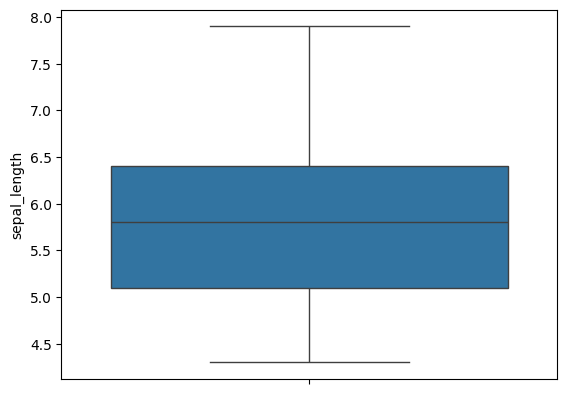

In [12]:
sns.boxplot(y=dataset['sepal_length'])

<Axes: ylabel='sepal_width'>

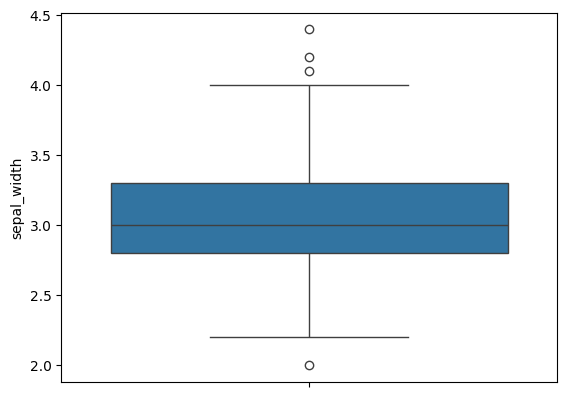

In [13]:
sns.boxplot(y=dataset['sepal_width'])

Now, Sepal Width Feature looks like it has some outliers in it's data. So, now we have to preprocess these outliers for proper funtioning of the dataset to create a Machine Learning Model

Check for the presence of outliers in the dataset using the Boxplot Visualizations

<Axes: ylabel='petal_length'>

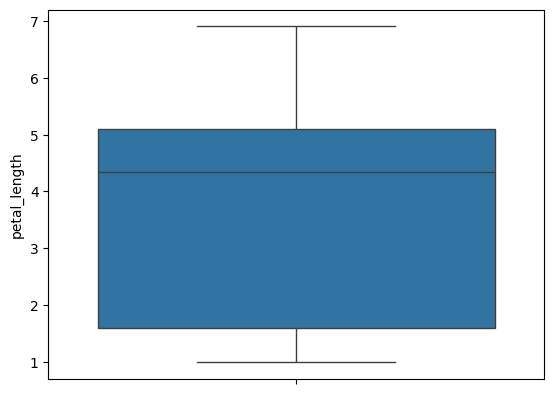

In [14]:
sns.boxplot(y=dataset['petal_length'])

<Axes: ylabel='petal_width'>

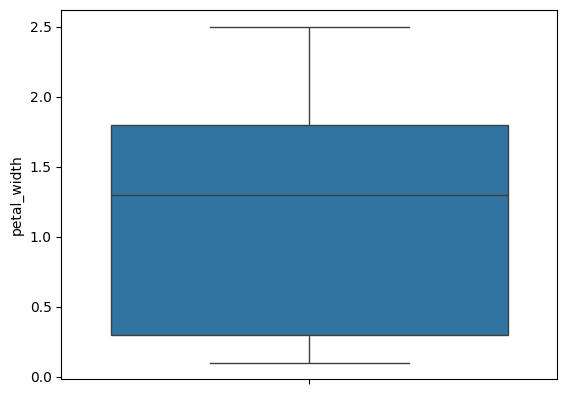

In [15]:
sns.boxplot(y=dataset['petal_width'])

Now, before treating the outliers, we just look at the Feature description of the target parameter "Species". This shows that there are 3 types of species and are of equal in number.

Now, before treating the outliers, we just look at the Feature description of the target parameter "Species". This shows that there are 3 types of species and are of equal in number.

In [16]:
dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Separate the Predictor Variables and the Target Variables

In [17]:
features = dataset.drop('Species', axis=1)
target = dataset['Species']


### Outlier Detection

Z-Score function in the statistics is used to identify the outliers in your dataset


In [18]:
from scipy import stats
z = np.abs(stats.zscore(features))
print(z)

           Id  sepal_length  sepal_width  petal_length  petal_width
0    1.720542      0.900681     1.032057      1.341272     1.312977
1    1.697448      1.143017     0.124958      1.341272     1.312977
2    1.674353      1.385353     0.337848      1.398138     1.312977
3    1.651258      1.506521     0.106445      1.284407     1.312977
4    1.628164      1.021849     1.263460      1.341272     1.312977
..        ...           ...          ...           ...          ...
145  1.628164      1.038005     0.124958      0.819624     1.447956
146  1.651258      0.553333     1.281972      0.705893     0.922064
147  1.674353      0.795669     0.124958      0.819624     1.053537
148  1.697448      0.432165     0.800654      0.933356     1.447956
149  1.720542      0.068662     0.124958      0.762759     0.790591

[150 rows x 5 columns]


In [20]:
threshold = 3
print(np.where(z>threshold))


(array([15], dtype=int64), array([2], dtype=int64))


In [22]:
data_new = features[z>threshold]
#print(data_new)


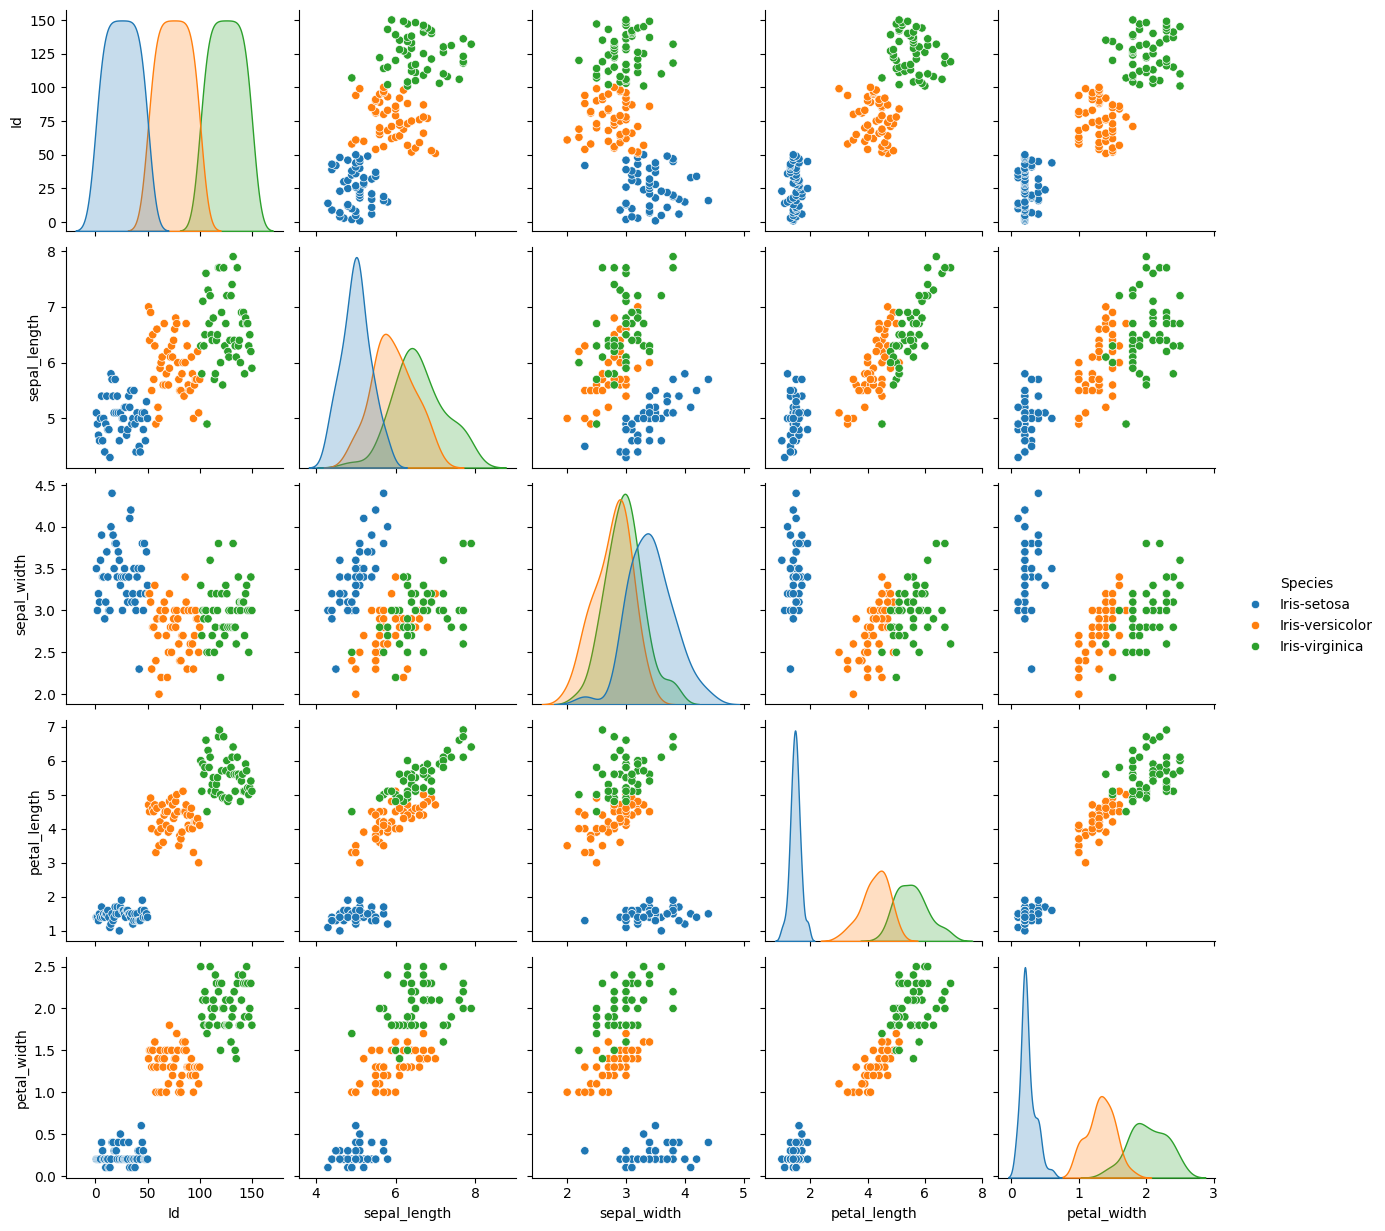

In [23]:
sns.pairplot(dataset, hue='Species')


#### Scaling
It's time for the predictor variables to be scaled down to a common value. We use standard scaler technique because the distribution is Standard Normal Distribution.

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [26]:
scale.fit(features)

StandardScaler()

In [27]:
scaled_features=scale.transform(features)

In [28]:
data_new = pd.DataFrame(scaled_features)
data_new.head(3)

,0,1,2,3,4
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977


In [29]:
# Separate features (sepal and petal measurements) and target (species)
X = dataset.iloc[:, 1:5]  # Features
y = dataset['Species']   # Target


In [30]:
from sklearn.preprocessing import LabelEncoder

# assuming y is your target vector
encoder = LabelEncoder()

# Fit the encoder and transform your data
y_encoded = encoder.fit_transform(target)


### Split the Dataset
So, finally we scaled down the data and the next step is to split the dataset into train and test sets


In [31]:
x_train, x_test, y_train, y_test = train_test_split(data_new, y_encoded, test_size=0.25, random_state=45)


In [32]:
x_train.shape


(112, 5)

In [33]:
print(x_train.head())

           0         1         2         3         4
74 -0.011547  0.674501 -0.356361  0.307833  0.133226
30 -1.027706 -1.264185  0.106445 -1.227541 -1.312977
33 -0.958423 -0.416010  2.651878 -1.341272 -1.312977
82  0.173209 -0.052506 -0.819166  0.080370  0.001753
1  -1.697448 -1.143017 -0.124958 -1.341272 -1.312977


In [34]:
print(x_test.head())


            0         1         2         3         4
0   -1.720542 -0.900681  1.032057 -1.341272 -1.312977
43  -0.727478 -1.021849  1.032057 -1.227541 -0.787085
129  1.258652  1.643844 -0.124958  1.160819  0.527645
3   -1.651258 -1.506521  0.106445 -1.284407 -1.312977
34  -0.935328 -1.143017  0.106445 -1.284407 -1.444450


In [35]:
print(y_train)

[1 0 0 1 0 1 1 0 2 1 2 0 0 1 2 0 2 0 0 1 0 1 1 2 1 2 0 0 0 0 1 0 1 2 1 1 1
 0 0 1 0 1 2 2 2 1 1 2 1 0 1 1 1 2 1 1 2 1 1 2 2 2 0 0 1 2 2 2 0 1 2 1 1 1
 0 2 2 0 0 2 0 2 1 1 2 2 1 0 0 2 0 1 2 2 0 0 0 2 0 0 2 1 1 1 0 2 2 1 1 0 2
 2]


In [36]:
print(y_test)

[0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1 1 1 2 1 0 2 1 1 0 1 1 1 2 2 0 2 0
 0]


In [37]:
model = KNeighborsClassifier(n_neighbors=21)

In [38]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

### Model Evaluation

After you split the dataset into training and test dataset, the task is to train the model with your training data. 

In [39]:
prediction = model.predict(x_test)


In [40]:
# Evaluate the model
from sklearn.metrics import roc_auc_score

print(f'Accuracy: {accuracy_score(y_test, prediction)}')

Accuracy: 0.9736842105263158


In [41]:
# Display Precision, Recall and F1-Score
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      1.00      0.95         9
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [42]:
# Display Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))

[[14  0  0]
 [ 0  9  0]
 [ 0  1 14]]


### Task 2: Explain your implementation
Provide detailed explanation and discussion about your implementation. Break it down to different steps as relevant to your implementation.

K-Nearest Neighbors (KNN) is a type of instance-based learning algorithm used for classification and regression. In the context of the Iris dataset for this project, we perform classification. 

1. Importing Required Libraries:

- import pandas as pd: imports function for data processing
- import seaborn as sns: Imports the function for data visualization
- import matplotlib.pyplot as plt:Imports the function for data visualization
- from sklearn.datasets import load_iris: Imports the Iris dataset from scikit-learn.
- from sklearn.model_selection import train_test_split: Imports the function for splitting the dataset into training and testing sets.
- from sklearn.preprocessing import StandardScaler: Imports the StandardScaler for feature standardization.
- from sklearn.neighbors import KNeighborsClassifier: Imports the KNeighborsClassifier for KNN classification.
- from sklearn.metrics import classification_report: Imports the classification_report function and accuracy score to evaluate the classifier's performance.


2. Import Dataset
   
- In this code, we first load the Iris dataset and split it into a training set and a test set. 
- The Iris dataset is a classic dataset used in machine learning and statistics. It contains measurements of 150 iris flowers from three different species: setosa, versicolor, and virginica. The four measurements (features) included in the dataset are sepal length, sepal width, petal length, and petal width.



3. Data Exploration:

For data exploration, the following processes are performed:

- Find the Dimensions of the dataset
- Print the head and tail of the data to understand various features of the dataset
- Identify the information about the dataset (like column names, datatypes etc.)
- Describe the summary features of the dataset (Mean, Count, Quantiles etc.)
- Visualize all the required plots.


4. Loading and Preprocessing Data:

- The Iris dataset is loaded, and features (X) and target labels (y) are extracted.
- The dataset is split into training and testing sets using train_test_split with a test size of 25% and a random state of 45.
- The features are standardized using StandardScaler to have zero mean and unit variance. Standardize the features using StandardScaler, which scales the features to have a mean of 0 and a variance of 1.
- The target variable is normalized by converting the species categorical variables i.e. iris-setosa, iris-versicolor and iris-virginica into numerical variables by performing label encoding.


5. Creating and Training the KNN Classifier:
- A KNN classifier with 21 neighbours is instantiated.
- Create a KNN classifier with KNeighborsClassifier, specifying 21 as the number of neighbours to consider (n_neighbors=21)
- The classifier is trained on the standardized training data (x_train, y_train) using the fit method.


6. Evaluating Model Performance:
- Predict the labels of the test set using predict to obtain the accuracy score
- The classification_report function is used to generate a text report showing various classification metrics such as precision, recall, F1-score, and support for each class based on comparing the true labels (y_test) with the predicted labels (y_pred).

 Observation:
 
- An accuracy of 0.9737 was obtained.
- This means that K-Nearest Neighbors (KNN) model correctly classified the species of the Iris flowers for approximately 97.37% of the samples in the test set.
- This suggests that the model is performing quite well on this dataset.

While accuracy can be a good general indicator of the model’s performance, it is always a good idea to look at other metrics as well, especially for imbalanced datasets. In this context, we consider precision, recall, and the F1 score to give a more comprehensive view of your model’s performance.
The classification report provided for the Iris dataset using the k-Nearest Neighbors (KNN) algorithm is interpreted as follows:

- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
  
        Class 0: Precision of 1.00 means that all instances predicted as class 0 were actually class 0.
  
        Class 1: Precision of 0.90 indicates that 90% of instances predicted as class 1 were actually class 1.
  
        Class 2: Precision of 1.00 means that all instances predicted as class 2 were actually class 2.
    
- Recall: Recall is the ratio of correctly predicted positive observations to all observations in actual class.
  
        Class 0: Recall of 1.00 means that all actual class 0 instances were correctly predicted as class 0.
  
        Class 1: Recall of 1.00 indicates that all actual class 1 instances were correctly predicted as class 1.
  
        Class 2: Recall of 0.93 means that 93% of actual class 2 instances were correctly predicted as class 2.
    
- F1-Score: The F1-score is the weighted average of precision and recall, where the best value is 1 and the worst is 0.

In this case, the KNN model achieved high accuracy (97%) on the test set for the Iris dataset, with strong precision and recall values across different classes, indicating a good performance in predicting the classes based on the features in the dataset.


The model is evaluated again using confusino matrix. The confusion matrix obtained represents the performance of the k-Nearest Neighbors (KNN) classifier on the Iris dataset. Here is the interpretation of the confusion matrix:

- True Positive (TP): The diagonal elements represent the number of instances where the actual class and the predicted class are the same.
  
        Class 0: There are 14 instances correctly predicted as class 0.
  
        Class 1: There are 9 instances correctly predicted as class 1.
  
        Class 2: There are 14 instances correctly predicted as class 2.
  
- False Positive (FP): The columns represent the instances predicted in each class that actually belong to other classes.
  
        There are no false positives in this case, as all values outside the diagonal are zeros.
  
- False Negative (FN): The rows represent instances of each actual class that were incorrectly predicted as other classes.
  
        Class 1: One instance of actual class 1 was incorrectly predicted as class 2.
  
- True Negative (TN): The values not included in the confusion matrix are true negatives, which are instances correctly predicted as not belonging to a specific class. Since this is a multiclass classification problem, true negatives are not explicitly shown in the confusion matrix.

- The confusion matrix provides a detailed breakdown of the model's performance for each class, showing how well the KNN classifier predicted the different classes in the Iris dataset. In this case, the model performed well with high numbers of true positives and minimal misclassifications.





## Submission
Submit a link to your completed Jupyter Notebook file hosted on your private GitHub repository through the submission link in Blackboard.